In [1]:
suppressWarnings(suppressPackageStartupMessages(library(ggplot2)))
suppressWarnings(suppressPackageStartupMessages(library(dplyr)))

In [2]:
df <- file.path("../../4.processing_profiled_features/data/preprocessed_data/live_cell_pyroptosis_wave1_sc_first_time_norm_fs_subset.parquet")

df <- arrow::read_parquet(df)
df$well_fov <- paste0(df$Metadata_Well, "_", df$Metadata_FOV)
df$Metadata_timpoint <- as.numeric(df$Metadata_Time) * 3 # 3 hours
# show all columns in a jupyter notebooks
options(repr.matrix.max.cols=200, repr.matrix.max.rows=100)
head(df)

Metadata_treatment,Metadata_Well,Metadata_number_of_singlecells,Metadata_FOV,Metadata_treatment1,Metadata_Time,Metadata_treatment2,Metadata_treatment1_dose,Metadata_treatment1_unit,Metadata_treatment2_dose,Metadata_treatment2_unit,Metadata_serum,Metadata_ImageNumber,Metadata_Cells_Number_Object_Number,Metadata_Cytoplasm_Parent_Cells,Metadata_Cytoplasm_Parent_Nuclei,Metadata_ImageNumber_1,Metadata_ImageNumber_2,Metadata_ImageNumber_3,Metadata_Nuclei_Number_Object_Number,Metadata_Image_FileName_BF,Metadata_Image_FileName_CL488,Metadata_Image_FileName_CL561,Metadata_Image_FileName_DNA,Metadata_Image_FileName_GSDM,Metadata_Image_PathName_BF,Metadata_Image_PathName_CL488,Metadata_Image_PathName_CL561,Metadata_Image_PathName_DNA,Metadata_Image_PathName_GSDM,Metadata_Nuclei_Location_Center_X,Metadata_Nuclei_Location_Center_Y,Cytoplasm_AreaShape_Center_X,Cytoplasm_AreaShape_CentralMoment_0_3,Cytoplasm_AreaShape_CentralMoment_1_0,Cytoplasm_AreaShape_CentralMoment_1_1,Cytoplasm_AreaShape_CentralMoment_1_3,Cytoplasm_AreaShape_CentralMoment_2_1,Cytoplasm_AreaShape_Compactness,Cytoplasm_AreaShape_Eccentricity,Cytoplasm_AreaShape_Extent,Cytoplasm_AreaShape_HuMoment_0,Cytoplasm_AreaShape_HuMoment_2,Cytoplasm_AreaShape_HuMoment_4,Cytoplasm_AreaShape_HuMoment_6,Cytoplasm_AreaShape_InertiaTensor_0_0,Cytoplasm_AreaShape_InertiaTensor_0_1,Cytoplasm_AreaShape_InertiaTensor_1_1,Cytoplasm_AreaShape_MajorAxisLength,Cytoplasm_AreaShape_MeanRadius,Cytoplasm_AreaShape_MinFeretDiameter,Cytoplasm_AreaShape_MinorAxisLength,Cytoplasm_AreaShape_NormalizedMoment_0_2,Cytoplasm_AreaShape_NormalizedMoment_2_0,Cytoplasm_AreaShape_NormalizedMoment_3_0,Cytoplasm_AreaShape_Orientation,Cytoplasm_AreaShape_Perimeter,Cytoplasm_AreaShape_Zernike_0_0,Cytoplasm_AreaShape_Zernike_1_1,Cytoplasm_AreaShape_Zernike_2_0,Cytoplasm_AreaShape_Zernike_2_2,Cytoplasm_AreaShape_Zernike_3_1,Cytoplasm_AreaShape_Zernike_3_3,Cytoplasm_AreaShape_Zernike_4_0,Cytoplasm_AreaShape_Zernike_4_2,Cytoplasm_AreaShape_Zernike_4_4,Cytoplasm_AreaShape_Zernike_5_1,Cytoplasm_AreaShape_Zernike_5_3,Cytoplasm_AreaShape_Zernike_5_5,Cytoplasm_AreaShape_Zernike_6_0,Cytoplasm_AreaShape_Zernike_6_2,Cytoplasm_AreaShape_Zernike_6_4,Cytoplasm_AreaShape_Zernike_6_6,Cytoplasm_AreaShape_Zernike_7_1,Cytoplasm_AreaShape_Zernike_7_3,Cytoplasm_AreaShape_Zernike_7_5,Cytoplasm_AreaShape_Zernike_7_7,Cytoplasm_AreaShape_Zernike_8_0,Cytoplasm_AreaShape_Zernike_8_2,Cytoplasm_AreaShape_Zernike_8_4,Cytoplasm_AreaShape_Zernike_8_6,Cytoplasm_AreaShape_Zernike_8_8,Cytoplasm_AreaShape_Zernike_9_1,Cytoplasm_AreaShape_Zernike_9_3,Cytoplasm_AreaShape_Zernike_9_5,Cytoplasm_AreaShape_Zernike_9_7,Cytoplasm_AreaShape_Zernike_9_9,Cytoplasm_Granularity_1_BF,Cytoplasm_Granularity_1_CL488,Cytoplasm_Granularity_1_CL561,Cytoplasm_Granularity_1_DNA,Cytoplasm_Granularity_1_GSDM,Cytoplasm_Intensity_IntegratedIntensityEdge_CL488,Cytoplasm_Intensity_IntegratedIntensityEdge_CL561,Cytoplasm_Intensity_IntegratedIntensityEdge_DNA,Cytoplasm_Intensity_IntegratedIntensity_CL488,Cytoplasm_Intensity_IntegratedIntensity_CL561,Cytoplasm_Intensity_IntegratedIntensity_DNA,Cytoplasm_Intensity_MaxIntensity_CL488,Cytoplasm_Intensity_MeanIntensityEdge_DNA,⋯,Nuclei_RadialDistribution_ZernikeMagnitude_DNA_7_5,Nuclei_RadialDistribution_ZernikeMagnitude_DNA_7_7,Nuclei_RadialDistribution_ZernikeMagnitude_DNA_8_0,Nuclei_RadialDistribution_ZernikeMagnitude_DNA_8_2,Nuclei_RadialDistribution_ZernikeMagnitude_DNA_8_4,Nuclei_RadialDistribution_ZernikeMagnitude_DNA_8_6,Nuclei_RadialDistribution_ZernikeMagnitude_DNA_8_8,Nuclei_RadialDistribution_ZernikeMagnitude_DNA_9_1,Nuclei_RadialDistribution_ZernikeMagnitude_DNA_9_3,Nuclei_RadialDistribution_ZernikeMagnitude_DNA_9_5,Nuclei_RadialDistribution_ZernikeMagnitude_DNA_9_7,Nuclei_RadialDistribution_ZernikeMagnitude_DNA_9_9,Nuclei_RadialDistribution_ZernikePhase_CL561_1_1,Nuclei_RadialDistribution_ZernikePhase_CL561_2_2,Nuclei_RadialDistribution_ZernikePhase_CL561_3_1,Nuclei_RadialDistribution_ZernikePhase_CL561_3_3,Nuclei_RadialDist

In [3]:
# get the cell counts per well per time
cell_counts <- df %>% 
  group_by(Metadata_treatment, Metadata_timpoint) %>% 
  summarise(cell_count = sum(Metadata_number_of_singlecells))

head(cell_counts)

`summarise()` has grouped output by 'Metadata_treatment'. You can override
using the `.groups` argument.


Metadata_treatment,Metadata_timpoint,cell_count
<chr>,<dbl>,<int>
Ab1-42 0.4 uM,0,1119
Ab1-42 0.4 uM,3,1088
Ab1-42 0.4 uM,6,1315
Ab1-42 0.4 uM,9,2258
Ab1-42 0.4 uM,12,2513
Ab1-42 0.4 uM,15,2219


In [4]:
unique(cell_counts$Metadata_treatment)

cell_counts$Metadata_treatment <- factor(cell_counts$Metadata_treatment, levels=c(
    'Media',
    'DMSO CTL',
    'Thapsigargin 0.5uM',
    'Thapsigargin 1 uM',
    'Thapsigargin 10 uM',
    'Flagellin 0.1 ug/ml',
    'Flagellin 1 ug/ml',
    'Flagellin 10 ug/ml',
    'H2O2 100 nM',
    'H2O2 100 uM',
    'H2O2 500 uM',
    'LPS 0.1 ug/ml',
    'LPS 1 ug/ml',
    'LPS 1 ug/ml + ATP 2.5 mM',
    'LPS 1 ug/ml + Nigericin 0.1 uM',
    'LPS 1 ug/ml + Nigericin 0.5uM',
    'LPS 1 ug/ml + Nigericin 1 uM',
    'LPS 1 ug/ml + Nigericin 5uM',
    'LPS 10 ug/ml',
    'Ab1-42 0.4 uM',
    'Ab1-42 2 uM',
    'Ab1-42 10 uM'
))


[1] "Ab1-42 0.4 uM"                  "Ab1-42 10 uM"                  
 [3] "Ab1-42 2 uM"                    "DMSO CTL"                      
 [5] "Flagellin 0.1 ug/ml"            "Flagellin 1 ug/ml"             
 [7] "Flagellin 10 ug/ml"             "H2O2 100 nM"                   
 [9] "H2O2 100 uM"                    "H2O2 500 uM"                   
[11] "LPS 0.1 ug/ml"                  "LPS 1 ug/ml"                   
[13] "LPS 1 ug/ml + ATP 2.5 mM"       "LPS 1 ug/ml + Nigericin 0.1 uM"
[15] "LPS 1 ug/ml + Nigericin 0.5uM"  "LPS 1 ug/ml + Nigericin 1 uM"  
[17] "LPS 1 ug/ml + Nigericin 3uM"    "LPS 1 ug/ml + Nigericin 5uM"   
[19] "LPS 10 ug/ml"                   "Media"                         
[21] "Thapsigargin 0.5uM"             "Thapsigargin 1 uM"             
[23] "Thapsigargin 10 uM"

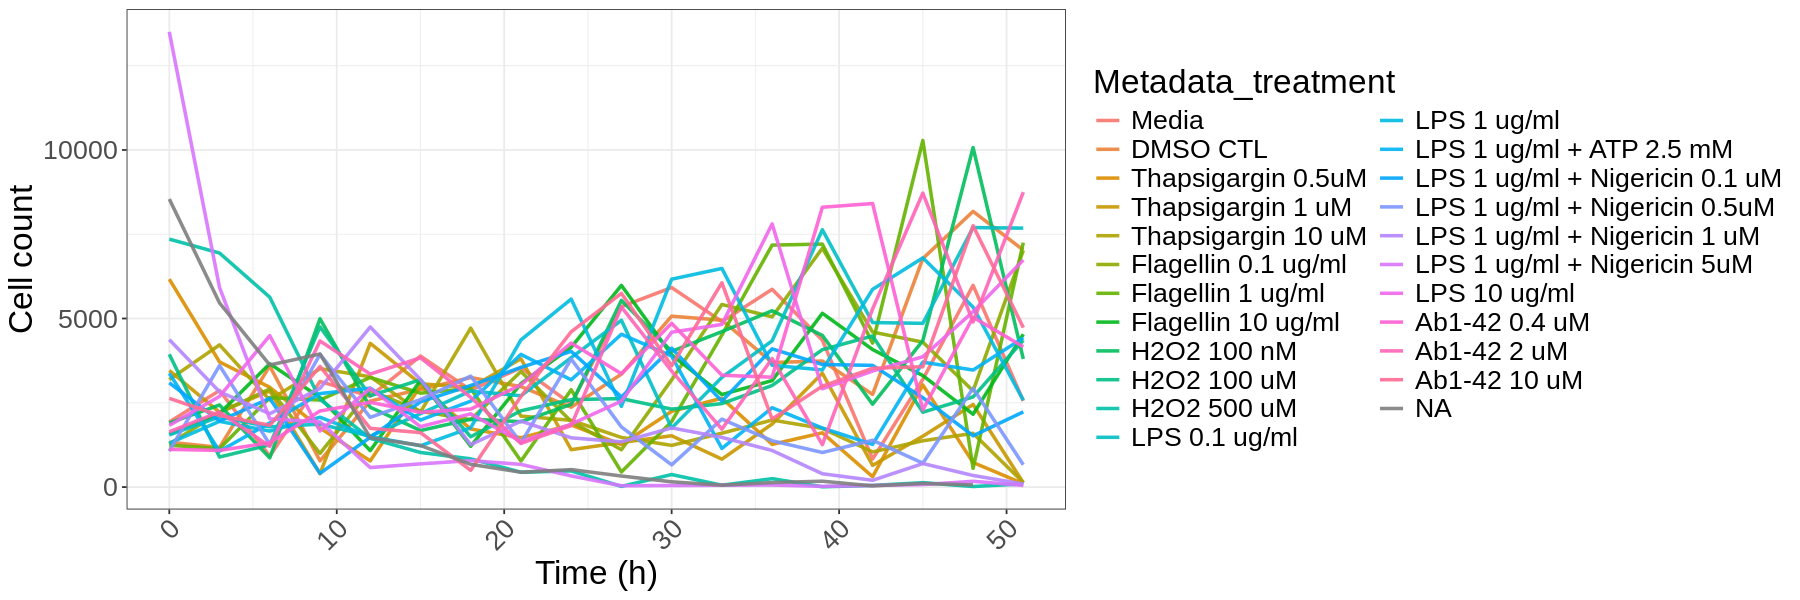

In [5]:
width <- 15
height <- 5
options(repr.plot.width=width, repr.plot.height=height)
# plot the timelapse _profiles for a given feature 
timelapse_plot <- (
    # group the timepoints by the feature
    ggplot(cell_counts, aes(x=Metadata_timpoint, y=cell_count), fill=Metadata_treatment)
    + geom_line(aes(group=Metadata_treatment, color=Metadata_treatment), alpha=0.9, linewidth=1)
    + theme_bw()

    + theme(
        axis.text.x = element_text(angle = 45, hjust = 1, size = 16),
        axis.text.y = element_text(size = 16),
        axis.title = element_text(size = 20),
        legend.title = element_text(size = 20),
        legend.text = element_text(size = 16),
    )
    + labs(
        x = "Time (h)",
        y = "Cell count"
    )
)
timelapse_plot

# save the plot
ggsave(file.path("../figures","cell_count_timelapse.png"), timelapse_plot, width=width, height=height, dpi=600)

In [6]:
min_time <- min(cell_counts$Metadata_timpoint)
max_time <- max(cell_counts$Metadata_timpoint)

# drop all other time points
cell_counts <- cell_counts %>% 
  filter(Metadata_timpoint == min_time | Metadata_timpoint == max_time)

# subtract the final time point from the initial time point cell count
cell_counts <- cell_counts %>% 
  group_by(Metadata_treatment) %>% 
  summarise(cell_count = diff(cell_count))
head(cell_counts)

`summarise()` has grouped output by 'Metadata_treatment'. You can override
using the `.groups` argument.


Metadata_treatment,cell_count
<fct>,<int>
Media,626
DMSO CTL,5699
Thapsigargin 0.5uM,-6067
Thapsigargin 1 uM,-3330
Thapsigargin 10 uM,-3053
Flagellin 0.1 ug/ml,5742


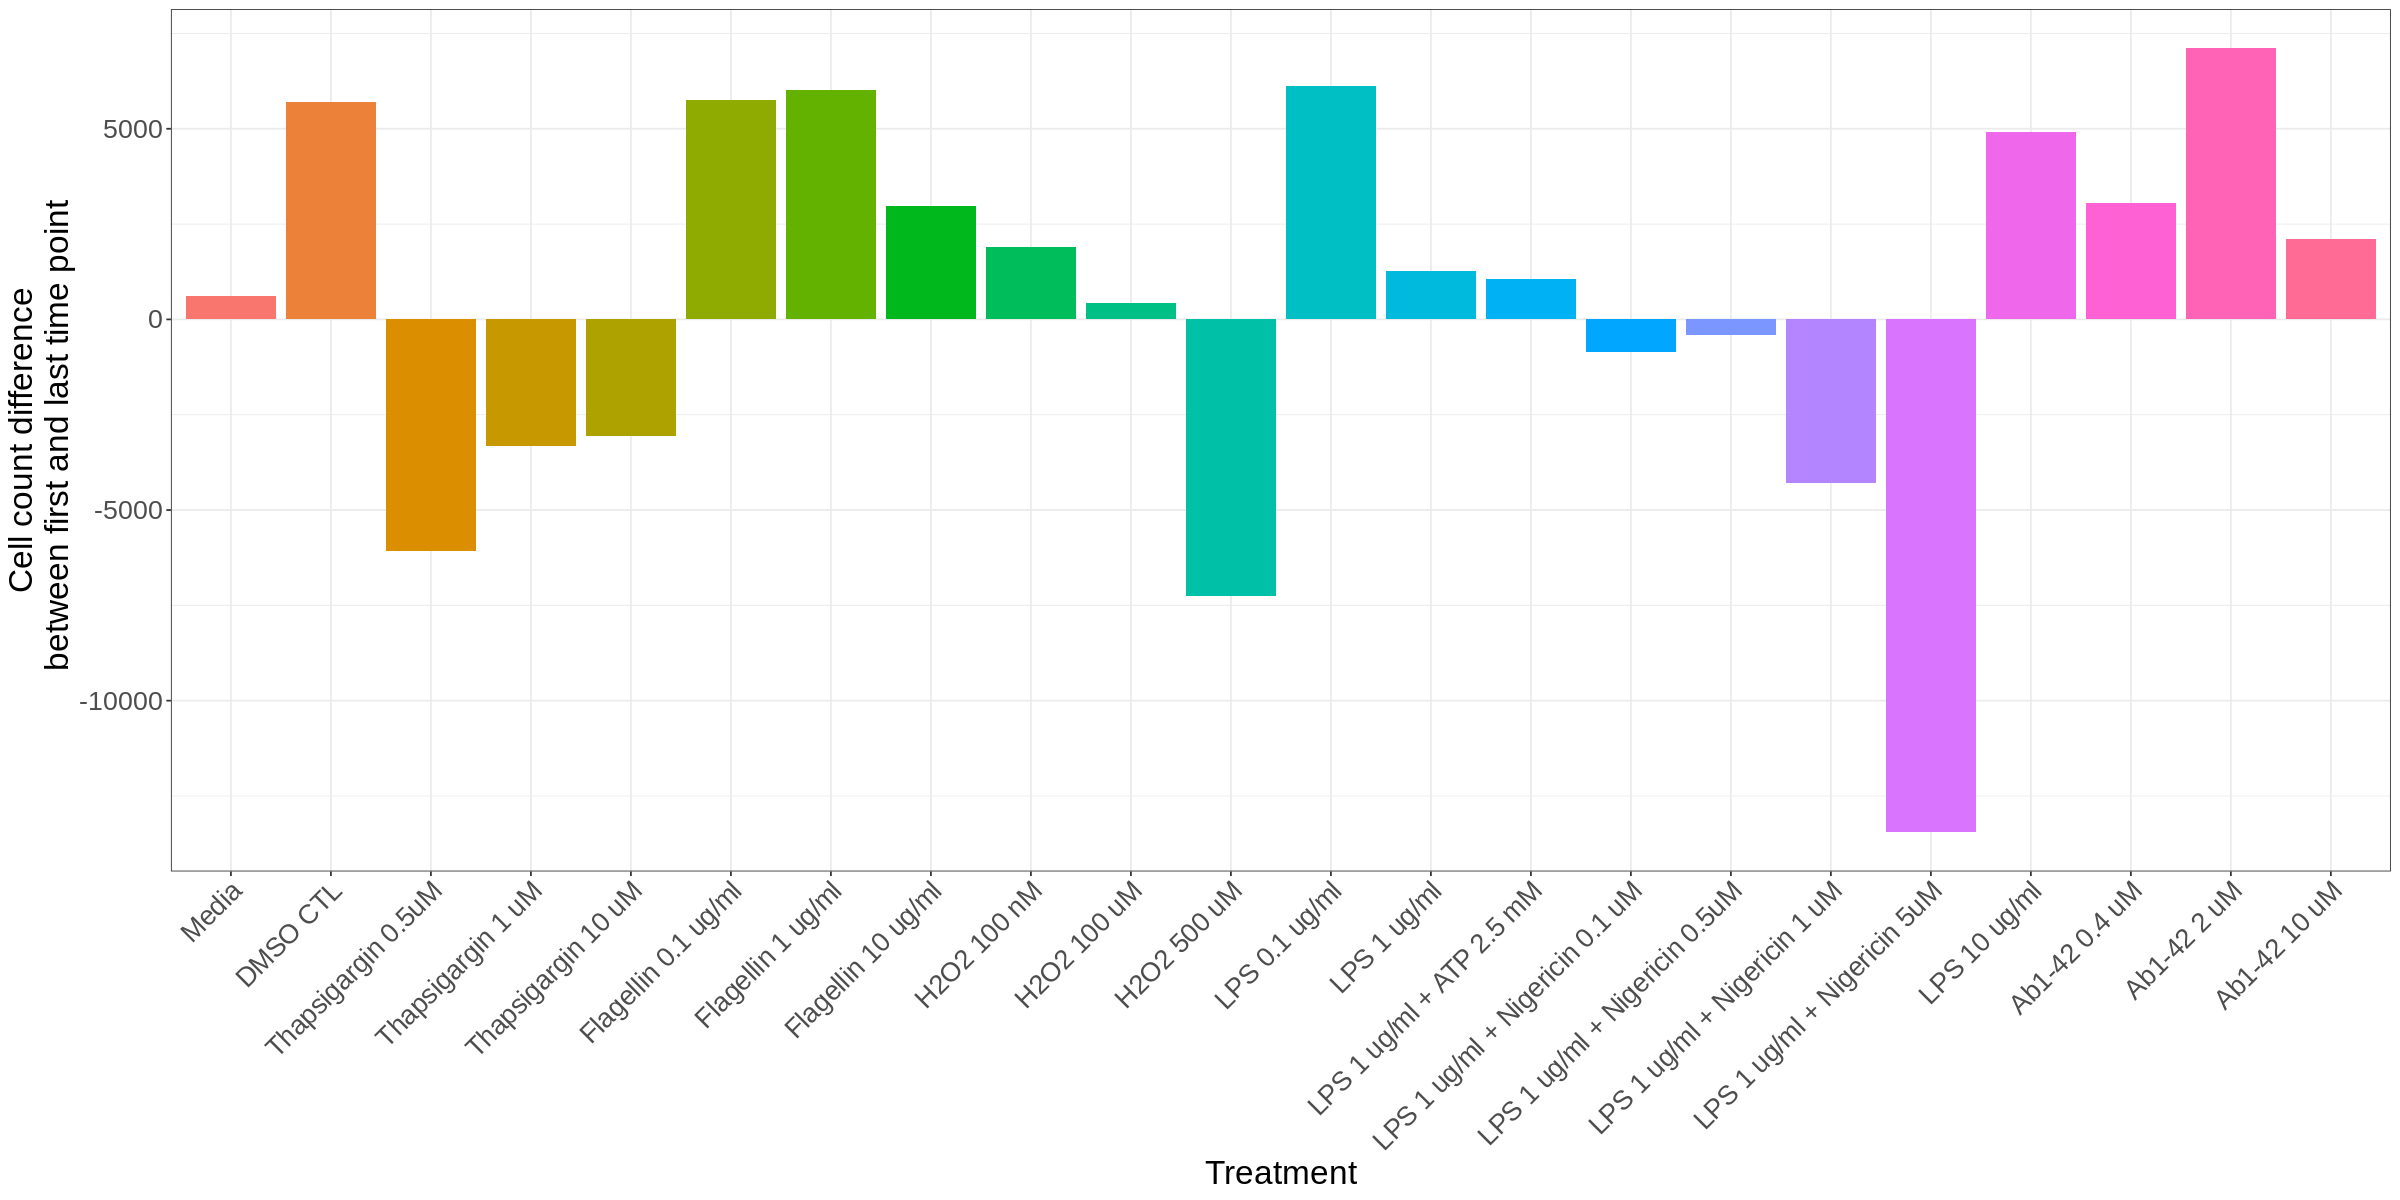

In [7]:
width <- 20
height <- 10
options(repr.plot.width=width, repr.plot.height=height)
# plot the timelapse _profiles for a given feature 
cell_count_difference_plot <- (
    # group the timepoints by the feature
    ggplot(cell_counts, aes(x=Metadata_treatment, y=cell_count), fill=Metadata_treatment)
    # bar plot for the cell counts per well per time
    + geom_bar(stat="identity", position="dodge", aes(fill=Metadata_treatment))
    + theme_bw()
    + theme(
        legend.position = "none", 
        axis.text.x = element_text(angle = 45, hjust = 1, size = 16),
        axis.text.y = element_text(size = 16),
        axis.title = element_text(size = 20)
    )

    + labs(x="Treatment", y="Cell count difference\n between first and last time point")
)
cell_count_difference_plot
ggsave(file.path("../figures","cell_count_difference.png"), cell_count_difference_plot, width=width, height=height, dpi=600)